### Bootstrap

### Packages

In [1]:
import pandas as pkg_pandas
import math as pkg_math
from matplotlib import pyplot as pkg_plot
from sklearn import model_selection as pkg_model_selection
from sklearn import preprocessing as pkg_preprocessing
from sklearn import svm as pkg_svm
from sklearn import metrics as pkg_metrics
from sklearn import datasets as pkg_datasets
import seaborn as pkg_seaborn

#### Load Data

In [2]:
loaded_data = pkg_datasets.load_iris()
dir(loaded_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
print("\nData Module = {}\nFile Name = {}\nFrame = {}".format(\
    loaded_data.data_module, loaded_data.filename, loaded_data.frame))


Data Module = sklearn.datasets.data
File Name = iris.csv
Frame = None


In [4]:
column_names = []
for feature_name in loaded_data.feature_names:
    column_name = feature_name.replace(' ', '_').replace('(','').replace(')','')
    column_names.append(column_name)

In [5]:
print("\nFeature Names = {}\nColumn Names = {}\nTarget Names = {}\nColumn".format(\
    loaded_data.feature_names, column_names, loaded_data.target_names))


Feature Names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Column Names = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
Target Names = ['setosa' 'versicolor' 'virginica']
Column


In [6]:
loaded_df = pkg_pandas.DataFrame(loaded_data.data, columns=column_names)
loaded_df['flower_number'] = loaded_data.target
loaded_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,flower_number
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
loaded_df['flower_name'] = loaded_df.flower_number.apply(lambda target_value: loaded_data.target_names[target_value])
loaded_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,flower_number,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


#### Plot Graphs

In [8]:
flower_df0 = loaded_df[loaded_df.flower_number == 0]
flower_df1 = loaded_df[loaded_df.flower_number == 1]
flower_df2 = loaded_df[loaded_df.flower_number == 2]

print("=== Data Set Sizes (Flower Type Wise) ===")
print("Lengths: flower_0 = {}, flower_1 = {}, flower_2 = {}".format(len(flower_df0), len(flower_df1), len(flower_df2)))

=== Data Set Sizes (Flower Type Wise) ===
Lengths: flower_0 = 50, flower_1 = 50, flower_2 = 50


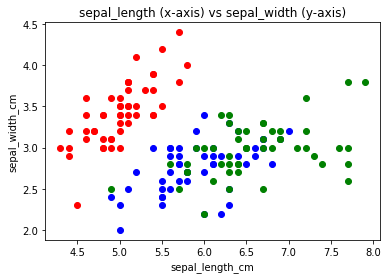

In [9]:
%matplotlib inline
pkg_plot.title('sepal_length (x-axis) vs sepal_width (y-axis)')
pkg_plot.xlabel('sepal_length_cm')
pkg_plot.ylabel('sepal_width_cm')
pkg_plot.scatter(flower_df0['sepal_length_cm'], flower_df0['sepal_width_cm'], color='red', marker='o')
pkg_plot.scatter(flower_df1['sepal_length_cm'], flower_df1['sepal_width_cm'], color='blue', marker='o')
pkg_plot.scatter(flower_df2['sepal_length_cm'], flower_df2['sepal_width_cm'], color='green', marker='o')

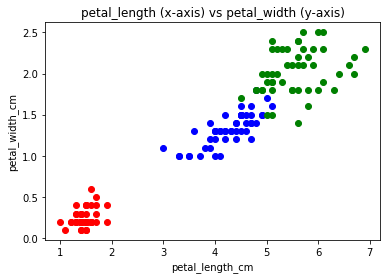

In [10]:
%matplotlib inline
pkg_plot.title('petal_length (x-axis) vs petal_width (y-axis)')
pkg_plot.xlabel('petal_length_cm')
pkg_plot.ylabel('petal_width_cm')
pkg_plot.scatter(flower_df0['petal_length_cm'], flower_df0['petal_width_cm'], color='red', marker='o')
pkg_plot.scatter(flower_df1['petal_length_cm'], flower_df1['petal_width_cm'], color='blue', marker='o')
pkg_plot.scatter(flower_df2['petal_length_cm'], flower_df2['petal_width_cm'], color='green', marker='o')

### Analysis

#### Pre-Work

In [11]:
baseline_inputs = loaded_df.drop(columns=['flower_number', 'flower_name'])
baseline_outputs = loaded_df['flower_number']

train_inputs, test_inputs, train_outputs, test_outputs  = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.25)

print("=== Baseline Split - Train and Test ===")
print("Lengths: Baseline = {}, Train = {}, Test = {}".format(len(baseline_inputs), len(train_inputs), len(test_inputs)))

=== Baseline Split - Train and Test ===
Lengths: Baseline = 150, Train = 112, Test = 38


#### Model: Train (Fit)

In [12]:
model = pkg_svm.SVC(gamma='auto')
model.fit(train_inputs, train_outputs)
model

SVC(gamma='auto')

In [13]:
baseline_score = model.score(baseline_inputs, baseline_outputs)
train_score = model.score(train_inputs, train_outputs)
test_score = model.score(test_inputs, test_outputs)
print("Score: Baseline = {}, Train = {}, Test = {}".format(baseline_score, train_score, test_score))

Score: Baseline = 0.9866666666666667, Train = 0.9910714285714286, Test = 0.9736842105263158
